In [40]:
# Importing required Libraries

import plotly
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import cufflinks as cf
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
cf.go_offline(connected=True)
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the data to dataframes
## Used ", " (comma and space) as seperator to read the file without any spaces

df_data = pd.read_csv("/Users/satishreddychirra/Document/DS5500 Data Visualization/KNN Data/adult.data.txt", sep=", ")
df_data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Summary of dataframe

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Unique Values of features Salary and Sex

uSalary = list(df_data.salary.unique())
print("Unique Values of Salary: " + str(uSalary)) 

uSex = list(df_data.sex.unique())
print("Unique Values of Sex: " + str(uSex)) 

Unique Values of Salary: ['<=50K', '>50K']
Unique Values of Sex: ['Male', 'Female']


In [6]:
# Converting features 'sex' and 'salary' to numerical

df_data.sex = np.where(df_data.sex == 'Male', 1, 0)
df_data.salary = np.where(df_data.salary == '>50K', 1 , 0)

In [7]:
df_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


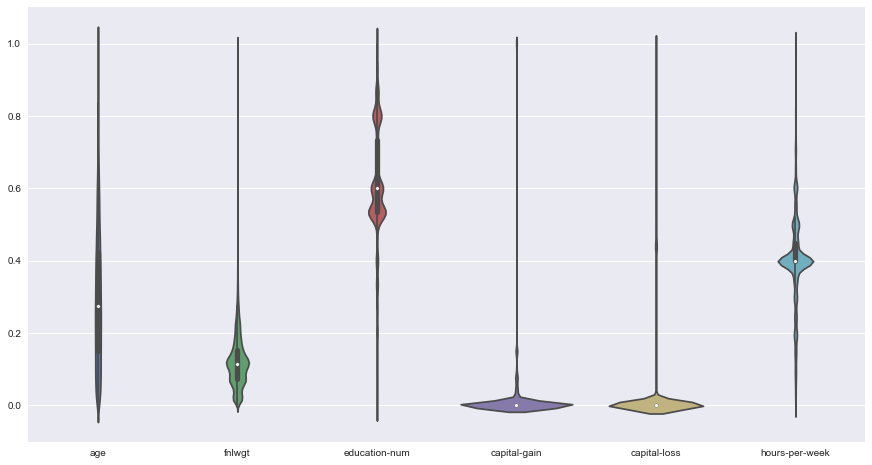

In [8]:
# Normalizing numerical features of the dataframe

numCols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
df_norm = (df_data[numCols]-df_data[numCols].min())/(df_data[numCols].max()-df_data[numCols].min())

# Plotting the distribution of normalized features.

plt.figure(figsize=(15,8))
sns.violinplot(df_norm)

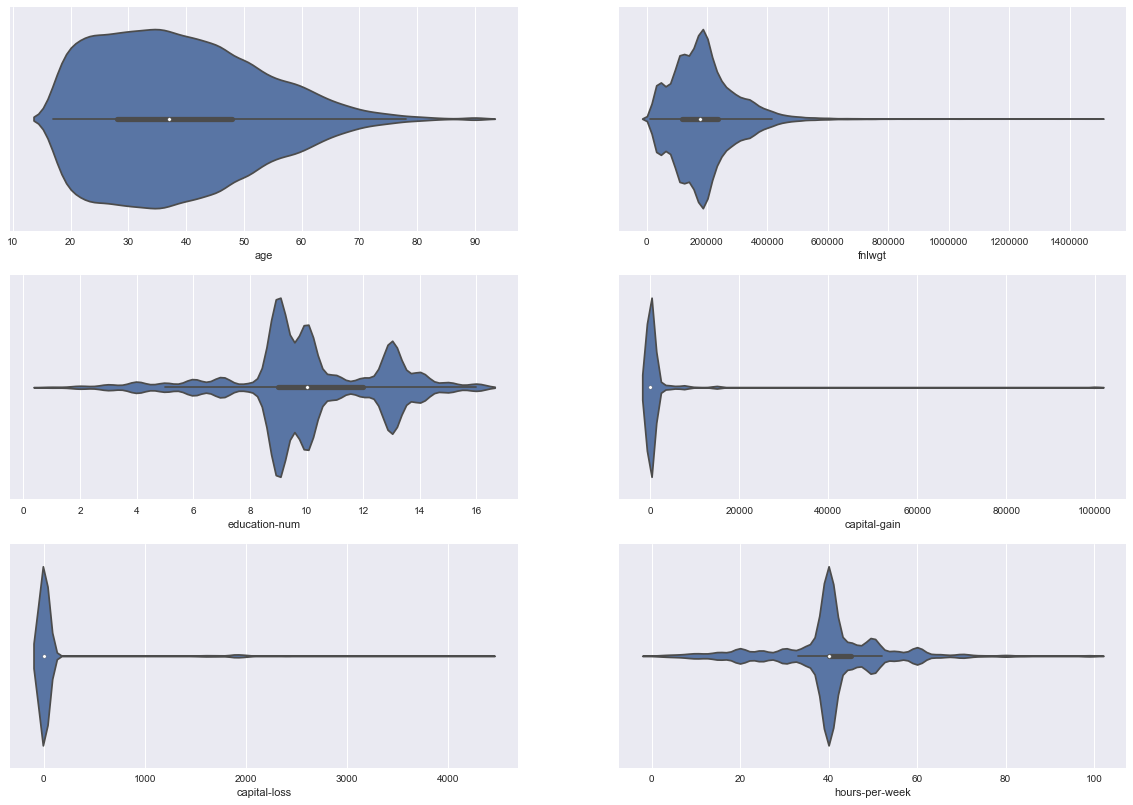

In [9]:
# Plotting the distribution of features (actual data)

plt.figure(figsize=(20,14))
plt.subplot(321)
sns.violinplot(df_data.age)

plt.subplot(322)
sns.violinplot(df_data.fnlwgt)

plt.subplot(323)
sns.violinplot(df_data['education-num'])

plt.subplot(324)
sns.violinplot(df_data['capital-gain'])

plt.subplot(325)
sns.violinplot(df_data['capital-loss'])

plt.subplot(326)
sns.violinplot(df_data['hours-per-week'])


For visualizations 1-2 write 2 sentences each describing what you learned about the dataset by visualizing it. What useful information did you learn that might help build a better ML model?

    From the above violin plot which is a combination of box plot and density plot, we can see that features like capital gain, capital loss, fnlwgt have skewed distribution with the medain (white dot) towards zero and for the other features although data distribution is not very skewed, we can see outlier in the data. Also the range of distribution of different features is different, which then causes models to incorrectly weight them that can be avoided by normalizing the features.

Describe and justify your visual encoding / design choices and how they are appropriate for the given task  (3 sentences - please cite slide #s, textbook pages, etc)

    Violin plot is more informative for plotting the distributions than the plain boxplot. Boxplot has shows only the summary statistics (like Mean, Median, min and max) where as violin plot show the actual distribution along with the summary statistics. 
    
    Reference: 
        [1] Lecture6-VisualEncoding slide-37
    
    

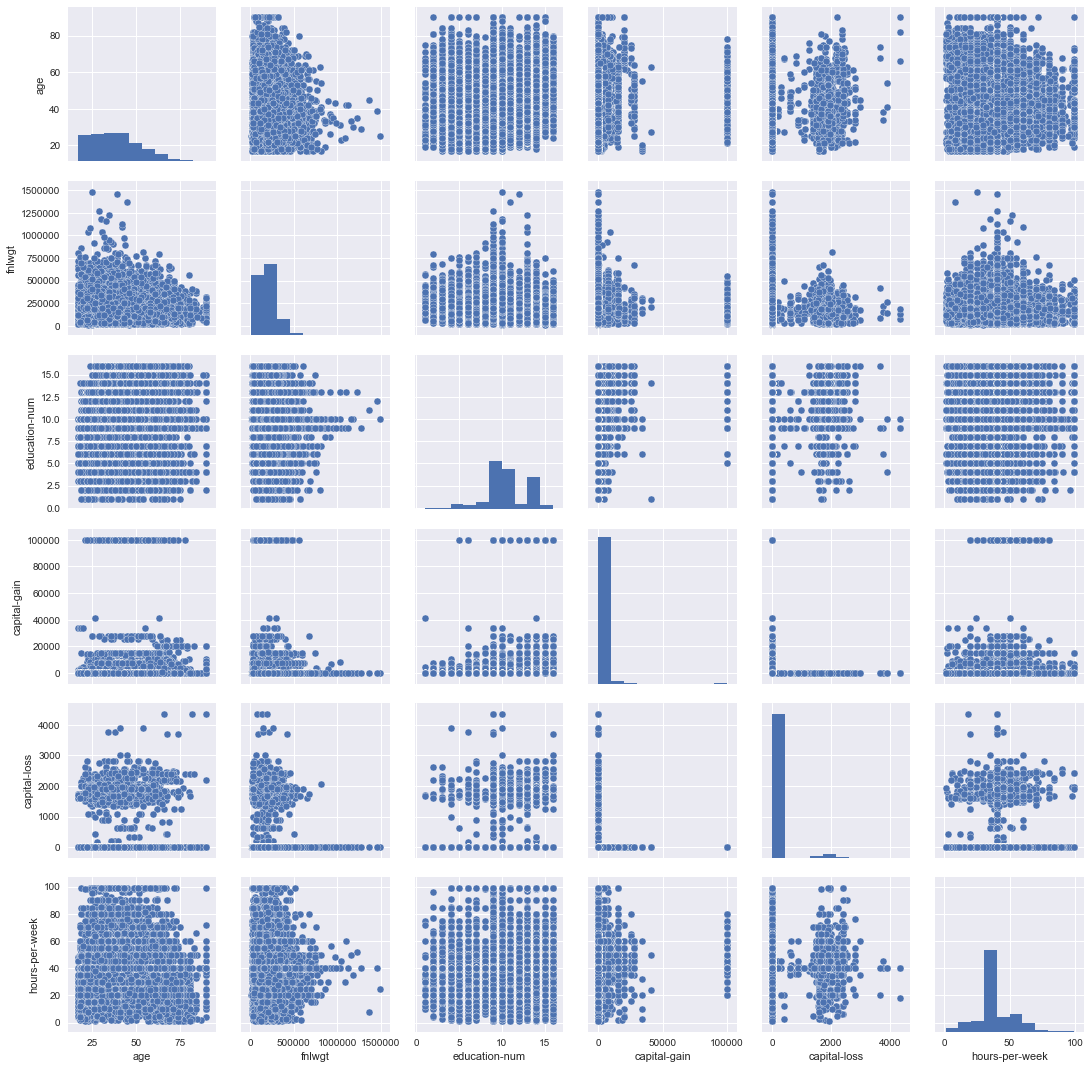

In [10]:
# Pairwise matrix of numerical data 

sns.pairplot(df_data[numCols], kind='scatter')


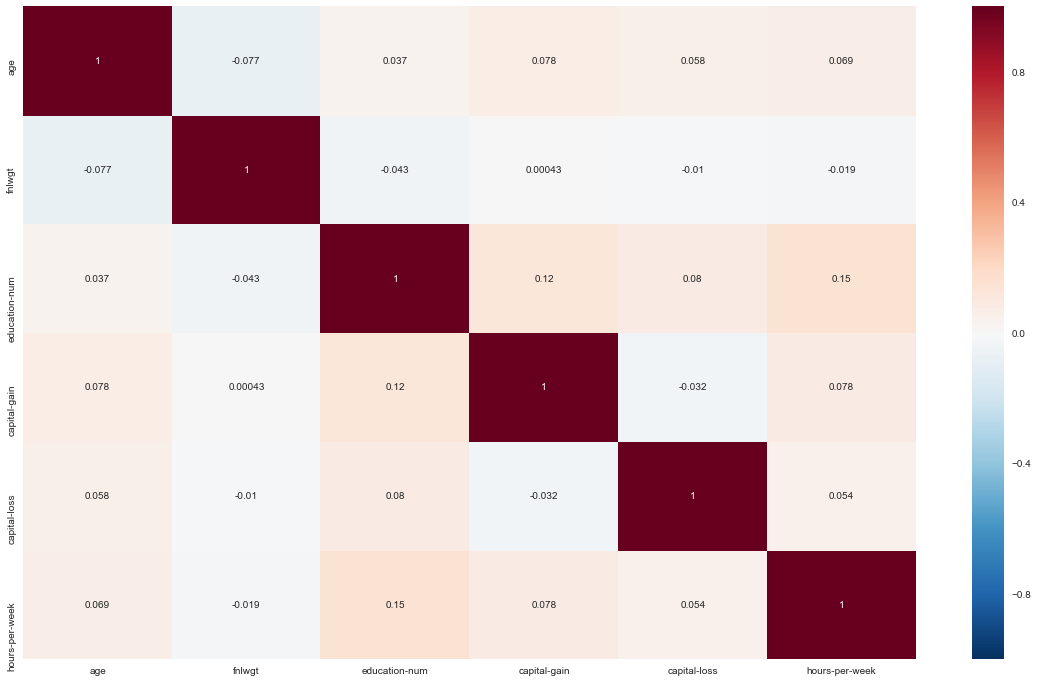

In [11]:
corrValues = df_data[numCols].corr()

# plot the heatmap
plt.figure(figsize=(20,12))
sns.heatmap(corrValues, annot=True)

For visualizations 1-2 write 2 sentences each describing what you learned about the dataset by visualizing it. What useful information did you learn that might help build a better ML model?

    Correlation matrix reveal linear relationship between the features if any. It is important to know if there is any correlation between the features before building the model as it effects the model results. From the above, we can see that there is no significant correlation between the features. Pairwise plot also gives you a similar information using plot, above we can see there is not linear reltionship between any features.

Describe and justify your visual encoding / design choices and how they are appropriate for the given task  (3 sentences - please cite slide #s, textbook pages, etc)

    Correlation matrix is the best way to polt the bivariate plots of all the features. The value of correlation ranges from -1 to 1, as it is a quantitative value it would be a good practice to use color scale which is in the right of above plot. I have also included the value of the on the each cell to make the plot more informatvie.
    
    Reference: 
        [1] Lecture6-VisualEncoding slide-33
    
    

In [12]:
## One-hot encoding for categorical features
# workclass, education, marital-status, occupation, relationship, race, native-country

catFeatures = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

# Unique Values of categorical features

def printUniqueValues(df, feature):
    lstUniqueVal = list(df[feature].unique())
    print("Unique Values of " + str(feature) + ": \n" + str(lstUniqueVal) + "\n")

# Function call for all the features

for element in catFeatures:
    printUniqueValues(df_data, element)


Unique Values of workclass: 
['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked']

Unique Values of education: 
['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th']

Unique Values of marital-status: 
['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']

Unique Values of occupation: 
['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', '?', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']

Unique Values of relationship: 
['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']

Unique Values of race: 
['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian

In [13]:
df_oneHot = pd.get_dummies(df_data[catFeatures])

In [14]:
df_oneHot.head()

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Dropping the columns which end with '?'

df_oneHot.drop(list(df_oneHot[df_oneHot.columns[df_oneHot.columns.str.endswith('?')]].columns), axis=1, inplace=True)

In [16]:
# Dropping categorical columns from dataframe 'df_data'

df_data.drop(catFeatures, axis=1, inplace=True)

In [17]:
# Merging the one-hot encoded columns and other to dataframe 'df'
df = pd.concat([df_data, df_oneHot], axis=1, join_axes=[df_data.index] )

In [18]:
# Split data randomly into train and test datasets with a ratio of 80:20.

train, test = train_test_split(df, test_size=0.2, random_state=34)

In [19]:
# Normalizing the continuous features in train data

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(train[numCols])
df_scaledNumCols = pd.DataFrame(x_scaled, columns=numCols)

In [20]:
# Merging the scaled features to 'df' dataframe

df.drop(numCols, axis=1, inplace=True)
df = pd.concat([df_data, df_scaledNumCols], axis=1, join_axes=[df_data.index] )

In [21]:
# Dividing the features and target

X_train, Y_train = train.drop('salary', axis=1), train['salary']
X_test, Y_test = test.drop('salary',axis=1), test['salary']

In [22]:
# Diplaying the shape of train and test datasets

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((26048, 104), (6513, 104), (26048,), (6513,))

In [32]:
## KNN
## Using grid search for finding optimal values for 'k' and 'p'

# List of values for k and p to be used for tuning
kVal = list(range(1,11))
pVal = [1,2]

# Initiating KNN
knn = KNeighborsClassifier()

param_grid = dict(n_neighbors=kVal, p=pVal)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2]}


In [26]:
# Strating grid search
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [27]:
# fit the grid with data
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [28]:
# Displaying Grid Search results

grid.grid_scores_

[mean: 0.73891, std: 0.00853, params: {'n_neighbors': 1, 'p': 1},
 mean: 0.73100, std: 0.00735, params: {'n_neighbors': 1, 'p': 2},
 mean: 0.78996, std: 0.00542, params: {'n_neighbors': 2, 'p': 1},
 mean: 0.78724, std: 0.00526, params: {'n_neighbors': 2, 'p': 2},
 mean: 0.76774, std: 0.01085, params: {'n_neighbors': 3, 'p': 1},
 mean: 0.76083, std: 0.00892, params: {'n_neighbors': 3, 'p': 2},
 mean: 0.79338, std: 0.00527, params: {'n_neighbors': 4, 'p': 1},
 mean: 0.79092, std: 0.00551, params: {'n_neighbors': 4, 'p': 2},
 mean: 0.78179, std: 0.00615, params: {'n_neighbors': 5, 'p': 1},
 mean: 0.77722, std: 0.00632, params: {'n_neighbors': 5, 'p': 2},
 mean: 0.79737, std: 0.00423, params: {'n_neighbors': 6, 'p': 1},
 mean: 0.79384, std: 0.00438, params: {'n_neighbors': 6, 'p': 2},
 mean: 0.79054, std: 0.00506, params: {'n_neighbors': 7, 'p': 1},
 mean: 0.78701, std: 0.00468, params: {'n_neighbors': 7, 'p': 2},
 mean: 0.79787, std: 0.00354, params: {'n_neighbors': 8, 'p': 1},
 mean: 0.7

In [29]:
# cv_validation_scores

grid_cv_scores = [list(result.cv_validation_scores) for result in grid.grid_scores_]

In [30]:
# Creating dataframe to get the accuracy, 'k' and 'P' values

kScore_p1 = [grid_cv_scores[i] for i in range(1,20,2)]
kScore_p2 = [grid_cv_scores[i] for i in range(0,20,2)]

kScores_p1 = [y for x in kScore_p1 for y in x]
kScores_p2 = [y for x in kScore_p2 for y in x]

k = [list(itertools.repeat(i, 10)) for i in range(1,11)]
kValue = [y for x in k for y in x]

df_scores = pd.DataFrame({'p1': kScores_p1, 'p2': kScores_p2, 'kVal': kValue})

In [31]:
# Scatter plot to display the result of KNN 

trace0 = go.Scatter(
    x = df_scores.index,
    y = df_scores.p1,
    mode = 'markers+lines',
    name = 'P=1',
    marker=dict(
        size=10,
        color = df_scores.kVal,
        colorbar=dict(title='Value of K'),
        showscale=True
    )
)
trace1 = go.Scatter(
    x = df_scores.index,
    y = df_scores.p2,
    mode = 'lines+markers',
    name = 'P=2',
    marker=dict(
        size=10,
        color = df_scores.kVal,
        colorbar=dict(title='Value of K'),
        showscale=True
    )
)

data = [trace0, trace1]


layout= go.Layout(
    legend=dict(
        x=0,
        y=1,
        traceorder='normal',
        font=dict(
            size=12,
            color='#000'
        )
    ),
    title= 'Performance of KNN',
    xaxis= dict(
        title= 'Number of runs'
    ),
    yaxis=dict(
        title= 'Accuracy'
    )
)  

fig= go.Figure(data=data, layout=layout)
py.iplot(fig)

Describe and justify your visual encoding / design choices and how they are appropriate for the given task  (3 sentences - please cite slide #s, textbook pages, etc)

    Number of Attributes: 4
    Marks: Points and Lines
    Channel:
        - Position: Both (Horizontal and Vertical)
        - Color: Color scale
        - Size: Length 


    As we have quantitative/categorical features, I have used position as channel which is ranked first in channel ranking by datatype for both the datatypes. In the above plot, color scale for points is used to indicate the value of k (number of neighbours). Line color is used to indicate the different values of p. Number of runs and Accuracy is indicated on x-axis and y-axis respectively. Moreover, as plotly is interative (allow zooming, display data on hover) it is easy to explore the data in detail.
    
    Reference: 
        [1] Lecture2 - Rules of Thumb and Design: slides 24,
        [2] Lecture3 - Marks and Channels: slides 27, 28, 40, 44
        [3] Lecture4 - Data Types: slides 21, 22

### Choosing the best parameters

From the grid search resutls, the mean accuracy of the KNN for k=10 and p=2 is ~79% with a standard deviation of 0.00289 which say the results are consistant. 

Therefore, the best parameter are k=10 and p=2.

In [37]:
## Bulding the model with best parameters

# Using best parameters
knn = KNeighborsClassifier(n_neighbors=10, p=2)

# Fitting the model
knn.fit(X_train, Y_train)

In [39]:
# make a prediction on out-of-sample data

y_pred = knn.predict(X_test)
testAcc = accuracy_score(Y_test, y_pred)

print("Accuracy on the test data is: ", testAcc)

Accuracy on the test data is:  0.791340396131


In [41]:
# Other metrics for classification confusion matrix from which we can get accuracy, recall, precision and others

confusion_matrix(Y_test, y_pred)

array([[4796,  129],
       [1230,  358]])

In [43]:
print("Accuracy", (4796+358)/(4796+358+1230+129))

Accuracy 0.7913403961308153
